# Answering questions

In [87]:
import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt

from datetime import datetime as dt

# Symbols for residential type to easily iterate over later
res_types = ['F', 'S', 'D', 'T']
df = pl.scan_parquet('outputs\\paid_prices-19-09-2025_09-47-34.parquet')
df.head().collect()

id,price,date,postcode,property_type,newly_built,freehold_or_lease,paon,soan,street,locality,town_city,district,postal_sector,latitude,longitude
str,f64,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""{01EB45EF-BCB5-40F3-E063-4704A…",225000.0,2023-04-24 00:00:00,"""OL9 0NG""","""T""","""N""","""L""","""955""","""""","""MIDDLETON ROAD""","""CHADDERTON""","""OLDHAM""","""OLDHAM""","""OL9 0""",53.548028,-2.157175
"""{3C17E818-0C2E-4827-9627-91F02…",42700.0,1999-07-02 00:00:00,"""M15 5AX""","""D""","""Y""","""L""","""107""","""""","""GREENHEYS LANE WEST""","""""","""MANCHESTER""","""MANCHESTER""","""M15 5""",53.462662,-2.249084
"""{DBA933F9-5C64-669D-E053-6B04A…",205000.0,2022-02-28 00:00:00,"""M24 4AR""","""S""","""N""","""L""","""39""","""""","""ASPELL CLOSE""","""MIDDLETON""","""MANCHESTER""","""ROCHDALE""","""M24 4""",53.550347,-2.204636
"""{5077A7AE-2769-49BC-A3D6-C8C63…",162000.0,2005-06-28 00:00:00,"""SK7 2DU""","""F""","""N""","""L""","""THE COPPICE""","""FLAT 14""","""BRAMHALL LANE SOUTH""","""BRAMHALL""","""STOCKPORT""","""STOCKPORT""","""SK7 2""",53.359961,-2.164897
"""{A0675032-3B95-4C0E-BCF3-C31B7…",32950.0,2004-12-03 00:00:00,"""WN7 2AQ""","""T""","""N""","""L""","""13""","""""","""LINGARD STREET""","""LEIGH""","""LEIGH""","""WIGAN""","""WN7 2""",53.494521,-2.50413


### Q1. What are the top 10 most expensive detached homes sold as Freehold in Manchester City after 2010?

In [88]:
q1 = (
        # Filter to the house type, freehold_or_lease type, city and date range specified
        df.filter(
        pl.col('property_type').eq('D'),            # detached houses
        pl.col('freehold_or_lease').eq('F'),        # sold as freehold
        pl.col('town_city').eq('MANCHESTER'),       # in Manchester city
        pl.col('date').dt.year().gt(2010)           # after 2010
    ) \
    # Order by price highest to lower to get the most expensive houses
    .sort('price', descending =  True) \
    # Drop rows with null prices as this is the value we are looking for so it can't be null
    .drop_nulls('price') \
    .head(10)
)

q1.collect()

id,price,date,postcode,property_type,newly_built,freehold_or_lease,paon,soan,street,locality,town_city,district,postal_sector,latitude,longitude
str,f64,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""{919FEC06-206B-9A90-E053-6C04A…",5.5e6,2019-06-05 00:00:00,"""M20 2PP""","""D""","""N""","""F""","""SILVERWOOD HOUSE, 129""","""""","""BARLOW MOOR ROAD""","""""","""MANCHESTER""","""MANCHESTER""","""M20 2""",53.420993,-2.243228
"""{EED73E76-92B1-6AF3-E053-6C04A…",5.2e6,2021-11-26 00:00:00,"""M1 5NP""","""D""","""N""","""F""","""7 - 9""","""""","""NEW WAKEFIELD STREET""","""""","""MANCHESTER""","""MANCHESTER""","""M1 5""",53.473533,-2.242638
"""{404A5AF4-5B8E-CD2B-E050-A8C06…",4.684515e6,2016-09-30 00:00:00,"""M9 4LA""","""D""","""N""","""F""","""145""","""""","""CHURCH LANE""","""""","""MANCHESTER""","""MANCHESTER""","""M9 4""",53.509205,-2.205749
"""{2FD36066-57B8-4BF8-E050-A8C06…",4.412e6,2016-02-24 00:00:00,"""M1 3FH""","""D""","""N""","""F""","""ARTHUR HOUSE""","""""","""CHORLTON STREET""","""""","""MANCHESTER""","""MANCHESTER""","""M1 3""",53.478577,-2.237273
"""{1775CCF7-2793-38BA-E063-4704A…",3.185e6,2023-12-19 00:00:00,"""M20 2RQ""","""D""","""N""","""F""","""STENNER BROW""","""""","""STENNER LANE""","""""","""MANCHESTER""","""MANCHESTER""","""M20 2""",53.409996,-2.231807
"""{CFC9085C-95B5-9A70-E053-6B04A…",2.7e6,2021-07-30 00:00:00,"""M28 2NT""","""D""","""N""","""F""","""94""","""""","""CHATSWORTH ROAD""","""WORSLEY""","""MANCHESTER""","""SALFORD""","""M28 2""",53.50101,-2.36049
"""{F87E72F9-DE63-176C-E053-6B04A…",2.575e6,2022-06-27 00:00:00,"""M28 2WT""","""D""","""N""","""F""","""46""","""""","""CHATSWORTH ROAD""","""WORSLEY""","""MANCHESTER""","""SALFORD""","""M28 2""",53.502071,-2.357243
"""{DBA933F9-5C72-669D-E053-6B04A…",2.5e6,2022-03-02 00:00:00,"""M45 7BX""","""D""","""N""","""F""","""5""","""""","""RINGLEY DRIVE""","""WHITEFIELD""","""MANCHESTER""","""BURY""","""M45 7""",53.546584,-2.304404
"""{D22473F5-8A93-7B40-E053-6C04A…",2.3e6,2021-09-10 00:00:00,"""M28 2WT""","""D""","""N""","""F""","""46""","""""","""CHATSWORTH ROAD""","""WORSLEY""","""MANCHESTER""","""SALFORD""","""M28 2""",53.502071,-2.357243


### Q2. What are the top 5 most expensive postal sectors (postal sectors are the section of the postal code after the area sector: examples include `M1 3`, `M1 4`) in the Salford district between March 2012 and September 2015?

In [89]:
q2 = (
    # Filter to date range and district specified
    df.filter(
        pl.col('district').eq('SALFORD'),
        pl.col('date').is_between(dt(2012, 3, 1), dt(2015, 9, 30))
    ) \
    # Group by postal sector and find the some postal sector aggregate stats
    .group_by('postal_sector') \
    .agg([
            pl.median('price').alias('median_price'),
            pl.mean('price').alias('mean_price'),
            pl.len().alias('num_sales')
        ]) \
    # Drop null in case the null postal sector was aggregated into a row
    .drop_nulls(['median_price', 'postal_sector']) \
    # sort by median price as it is robust to outliers
    .sort('median_price', descending =  True) \
    .head(5)
)

q2.collect()

postal_sector,median_price,mean_price,num_sales
str,f64,f64,u32
"""M28 2""",243750.0,314941.513274,452
"""M30 9""",170000.0,197548.487762,572
"""M28 1""",167750.0,203110.824766,428
"""M28 7""",165000.0,181070.443425,327
"""M7 4""",160000.0,187506.55102,344


### Q3. Where do you think in Greater Manchester are the most residential homes being built over the past 10 years?

In [93]:
q3 = (
    # Filter by property type, whether newly built and date range as specified
    df.filter(
        pl.col('property_type').is_in(res_types),
        pl.col('newly_built') == 'Y',
        pl.col('date').dt.year().ge(dt.now().year - 10)
    )
    # Find number of newly build houses sold per district
    .group_by('district')
    .len()
    .sort('len', descending=True)
    .head(10)
)

q3.collect()

district,len
str,u32
"""SALFORD""",12526
"""MANCHESTER""",11289
"""WIGAN""",7051
"""TRAFFORD""",3441
"""STOCKPORT""",3302
"""ROCHDALE""",3258
"""TAMESIDE""",2808
"""BOLTON""",2670
"""BURY""",1554


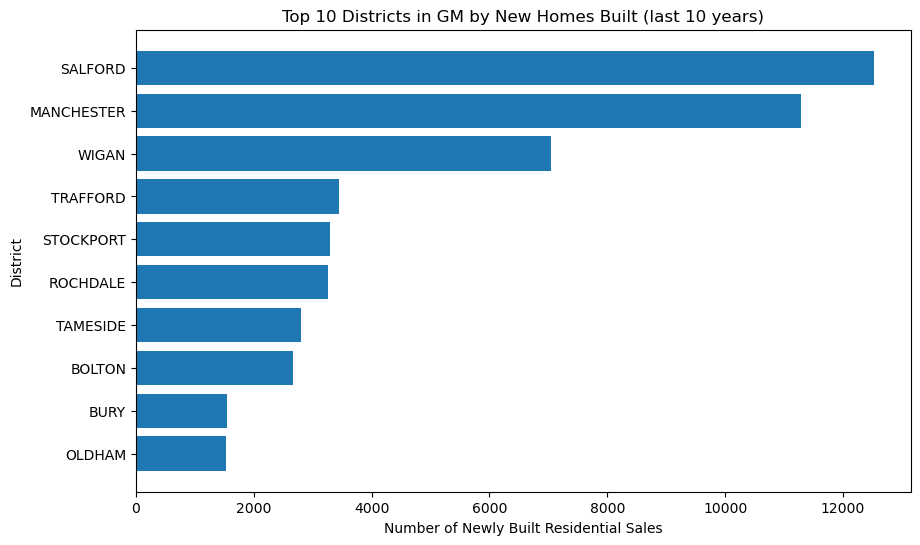

In [ ]:
import matplotlib.pyplot as plt

pdf = q3.collect().to_pandas()

plt.figure(figsize=(10,6))
plt.barh(pdf["district"].head(10), pdf["len"].head(10))
plt.xlabel("Number of Newly Built Residential Sales")
plt.ylabel("District")
plt.title("Top 10 Districts in Greater Manchester by New Houses Built (last 10 years)")
plt.gca().invert_yaxis()
plt.show()

### Q4. What was the most expensive non-residential property sold in Greater Manchester in 2017? Find and share context about this sale.

In [81]:
q4 = (
    # Filter to property type, and date range specified
    df.filter(
        pl.col('property_type').eq('O'),
        pl.col('date').dt.year().eq(2017)
    ) \
    # Order by price highest to lower to get the most expensive houses
    .sort('price', descending =  True) \
    # Drop rows with null prices
    .drop_nulls('price') \
    .head(1)
)

q4.collect()

id,price,date,postcode,property_type,newly_built,freehold_or_lease,paon,soan,street,locality,town_city,district,postal_sector,latitude,longitude
str,f64,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""{55BDCAE6-D4D7-521D-E053-6B04A…",1.07086856e8,2017-02-17 00:00:00,"""M4 2BS""","""O""","""N""","""F""","""THE PRINTWORKS, 27""","""""","""WITHY GROVE""","""""","""MANCHESTER""","""MANCHESTER""","""M4 2""",53.485185,-2.240775


- It's the second highest property sale in this dataset

In [85]:
# Avg price for non-residential properties in that postal_sector around that time
q4 = (
    # Order by price highest to lower to get the most expensive houses
    df.sort('price', descending =  True)
    # Drop rows with null prices
    .drop_nulls('price')
    .head(2)
)

q4.collect()

id,price,date,postcode,property_type,newly_built,freehold_or_lease,paon,soan,street,locality,town_city,district,postal_sector,latitude,longitude
str,f64,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""{E53EDD2E-ABFE-83EC-E053-6B04A…",2.92e8,2021-12-17 00:00:00,"""M3 3AQ""","""O""","""N""","""L""","""1""","""""","""HARDMAN BOULEVARD""","""""","""MANCHESTER""","""MANCHESTER""","""M3 3""",53.480414,-2.253286
"""{55BDCAE6-D4D7-521D-E053-6B04A…",1.07086856e8,2017-02-17 00:00:00,"""M4 2BS""","""O""","""N""","""F""","""THE PRINTWORKS, 27""","""""","""WITHY GROVE""","""""","""MANCHESTER""","""MANCHESTER""","""M4 2""",53.485185,-2.240775


### Q5. Which residential building types are seeing the biggest proportional rise in prices?

In [ ]:
q5a = (
    # Filter by type of property
    df.filter(pl.col('property_type').ne('O'))
    # May include null property_type so have to drop those rows
    .drop_nulls('property_type')
    
    # Create a year col so we can find the median price for each residential property type for each year
    .with_columns(year = pl.col('date').dt.year())
    .group_by(['year', 'property_type'])
    .agg(pl.median('price'))
    .sort(['property_type', 'year'])
)

# Get proportional rise in prices by by calculating first and last year median price per type
q5b = (
    q5a.group_by('property_type')
    .agg([
        pl.col('price').first().alias('first_price'),
        pl.col('price').last().alias('last_price')
    ])
    .with_columns(
        percentage_inc = (pl.col('last_price') - pl.col('first_price')) / pl.col('first_price') * 100
    )
    .sort('percentage_inc', descending=True)
)

q5b.collect()


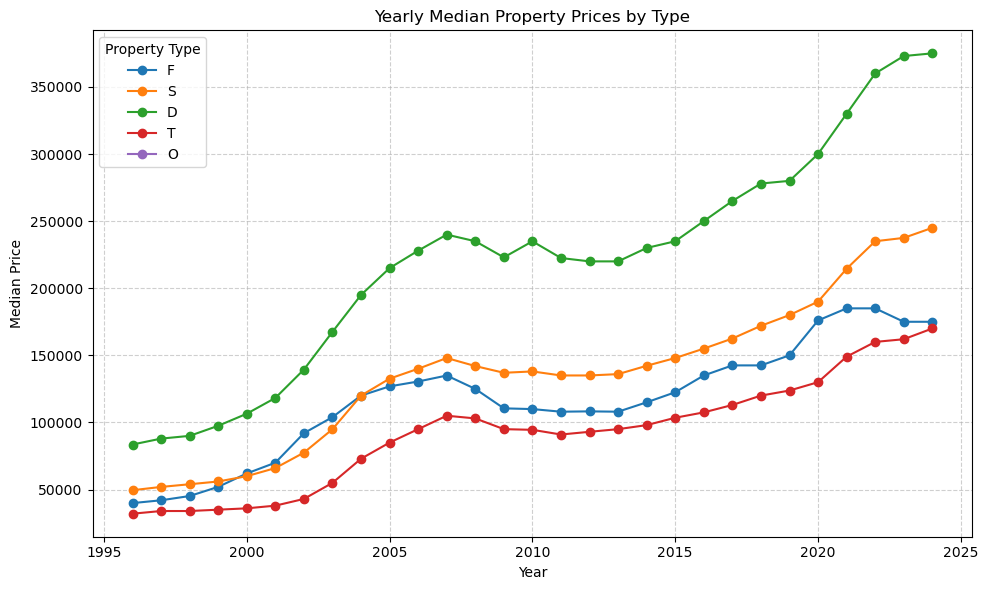

In [ ]:
# collect the aggregated yearly data into pandas for plotting
pdf = q5a.collect().to_pandas()

# Plot year against median price for each property type
plt.figure(figsize=(10,6))
for ptype in res_types:
    sub = pdf[pdf['property_type'] == ptype]
    plt.plot(sub['year'], sub['price'], marker='o', label=ptype)

plt.title('Yearly Median Property Prices by Type')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.legend(title='Property Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Q6. Since 1996, what property sale(s) in Trafford was the furthest south‑east?

In [ ]:
q6 = (
    df.filter(
        (pl.col('district') == 'TRAFFORD') &
        (pl.col('date').dt.year().ge(1996))
    )
    .drop_nulls(['latitude', 'latitude'])
    # compute a score for south-easterlyness: further south (-lat) + further east (+lon)
    .with_columns(
        se_score = (-pl.col('latitude')) + (pl.col('longitude'))
    )
    .sort('se_score', descending=True)
    .head(1)   # top 1 record furthest SE
)

q6.collect()

### Q7. Were there any other interesting trends, patterns, or issues you found?
See README and dashboard